In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, make_moons, make_blobs, make_gaussian_quantiles
 

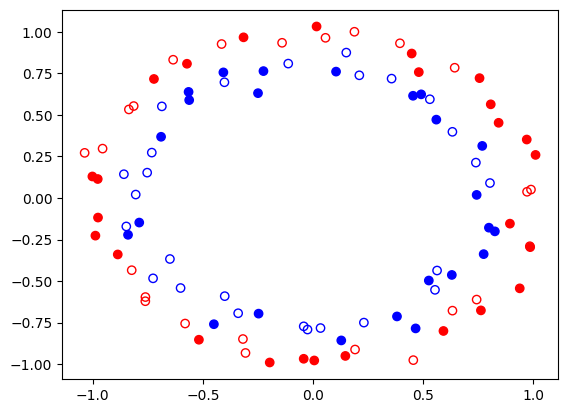

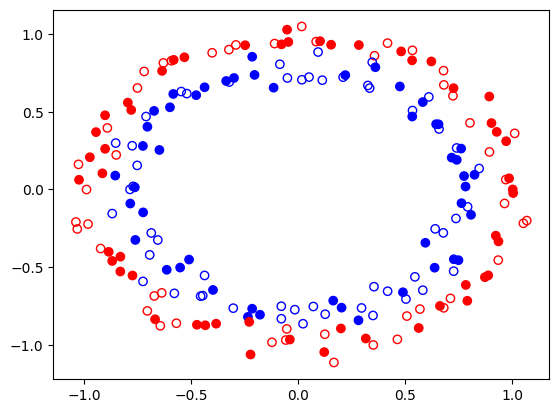

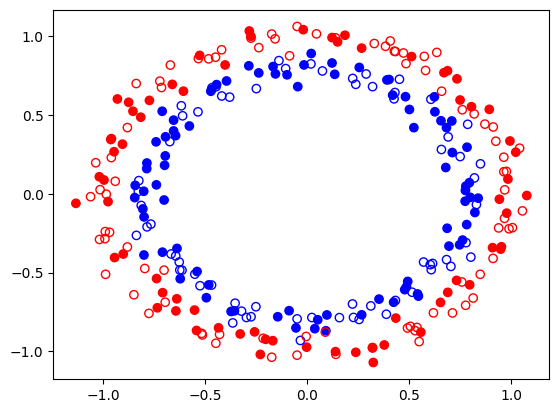

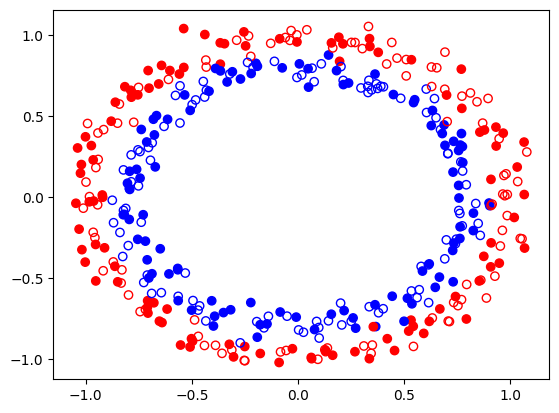

In [14]:
values = [100,200,300,400]    

for value in values:
    X, y = make_circles(n_samples=value, noise=0.05, factor = 0.8)
    y = np.where(y == 0, -1, y)
    x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.5)

    x_train_x = x_train[:,0]
    x_train_y = x_train[:,1]
    x_test_x = x_test[:,0]
    x_test_y = x_test[:,1]

    # -------------------------------- Initial Performance -----------------------------------

    class_colors = {-1: "red", 1: "blue"}
    colors_train = [class_colors[class_] for class_ in y_train]
    colors_test = [class_colors[class_] for class_ in y_test]

    plt.scatter(x_train_x, x_train_y, c = colors_train, marker = "o", label = "Train")
    plt.scatter(x_test_x, x_test_y, marker = "o", facecolors="none", edgecolors=colors_test, label = "Test")
    plt.show()

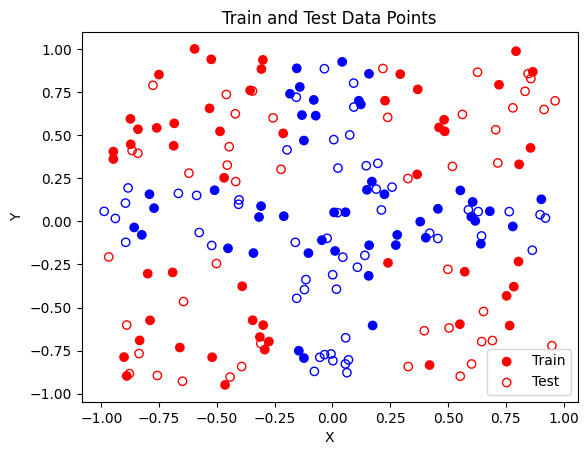

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Parameters
num_points_per_class = 100  # Half of the total number of points
square_size = 2.0
bar_width = 0.4  # Width of the bars forming the plus

# Function to check if a point is within the plus sign
def is_within_plus(x, y, bar_width):
    return (-bar_width / 2 <= x <= bar_width / 2 or -bar_width / 2 <= y <= bar_width / 2)

# Generate random points for class 1 (inside the plus)
points_class_1 = []
while len(points_class_1) < num_points_per_class:
    x, y = np.random.uniform(-square_size / 2, square_size / 2, 2)
    if is_within_plus(x, y, bar_width):
        points_class_1.append((x, y))

# Generate random points for class -1 (outside the plus)
points_class_minus_1 = []
while len(points_class_minus_1) < num_points_per_class:
    x, y = np.random.uniform(-square_size / 2, square_size / 2, 2)
    if not is_within_plus(x, y, bar_width):
        points_class_minus_1.append((x, y))

# Combine the points and create labels
X = np.array(points_class_1 + points_class_minus_1)
y = np.array([1] * num_points_per_class + [-1] * num_points_per_class)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Separate coordinates
x_train_x = X_train[:, 0]
x_train_y = X_train[:, 1]
x_test_x = X_test[:, 0]
x_test_y = X_test[:, 1]

# -------------------------------- Initial Performance -----------------------------------

class_colors = {-1: "red", 1: "blue"}
colors_train = [class_colors[class_] for class_ in y_train]
colors_test = [class_colors[class_] for class_ in y_test]

plt.scatter(x_train_x, x_train_y, c=colors_train, marker="o", label="Train")
plt.scatter(x_test_x, x_test_y, marker="o", facecolors="none", edgecolors=colors_test, label="Test")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Train and Test Data Points')
plt.legend()
plt.show()

corners = {
    100: {
    "x_train":X_train,
    "y_train":y_train,
    "x_test": X_test,
    "y_test": y_test
    }
}

np.save("corners.npy", corners)

FileNotFoundError: [Errno 2] No such file or directory: '/home/users/coelho/quantum_kernels/efficient_kta/figures/datasets/corners.png'

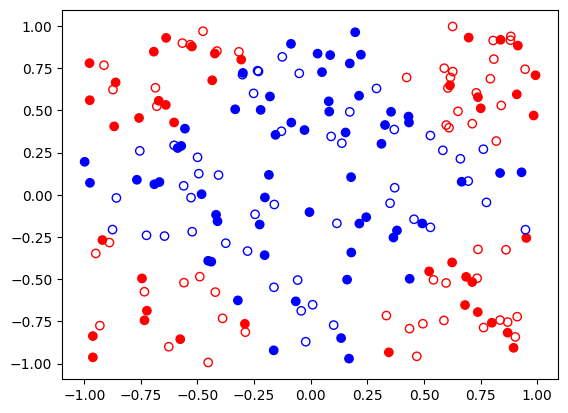

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
radius = 0.75
num_points = 200
square_size = 2.0

# Generate random points within the square
points = np.random.uniform(-square_size / 2, square_size / 2, (num_points, 2))

# Function to check if a point is inside any of the quarter circles
def is_inside_circle(x, y, center_x, center_y, radius):
    return (x - center_x)**2 + (y - center_y)**2 <= radius**2

# Classify points
labels = []
for x, y in points:
    if (is_inside_circle(x, y, -square_size / 2, -square_size / 2, radius) or
        is_inside_circle(x, y, square_size / 2, -square_size / 2, radius) or
        is_inside_circle(x, y, -square_size / 2, square_size / 2, radius) or
        is_inside_circle(x, y, square_size / 2, square_size / 2, radius)):
        labels.append(-1)
    else:
        labels.append(1)

# Convert to NumPy array
labels = np.array(labels)

# Plot the dataset
x_train, x_test, y_train, y_test  = train_test_split(points, labels, test_size=0.5)

x_train_x = x_train[:,0]
x_train_y = x_train[:,1]
x_test_x = x_test[:,0]
x_test_y = x_test[:,1]
# -------------------------------- Initial Performance -----------------------------------
class_colors = {-1: "red", 1: "blue"}
colors_train = [class_colors[class_] for class_ in y_train]
colors_test = [class_colors[class_] for class_ in y_test]
plt.scatter(x_train_x, x_train_y, c = colors_train, marker = "o", label = "Train")
plt.scatter(x_test_x, x_test_y, marker = "o", facecolors="none", edgecolors=colors_test, label = "Test")
plt.savefig("figures/datasets/corners.png", dpi=300)

In [2]:
grid_size_x = 4
grid_size_y = 4
centroids = np.zeros((grid_size_x,grid_size_y,2))
for x in range(grid_size_x):
    for y in range(grid_size_y):
        centroids[x,y,0] = (2*x+1) / 8
        centroids[x,y,1] = (2*y+1) / 8

total_points = 400
# Let's start by sampling 2 points for each centroid
labels_centroids = np.array([1,-1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,1,-1,1]).reshape(4,4)


points = []
labels = []
for index_x,centroids_x in enumerate(centroids):
    for index_y,centroid in enumerate(centroids_x):
        points_x = np.random.uniform(low = centroid[0] - 0.05, high = centroid[0] + 0.05, size = (2,))
        points_y = np.random.uniform(low = centroid[1] - 0.05, high = centroid[1] + 0.05, size = (2,))
        point_1 = [points_x[0],points_y[0]]
        point_2 = [points_x[1], points_y[1]]
        label = labels_centroids[index_x,index_y]
        points.append(point_1)
        points.append(point_2)
        labels.append(label)
        labels.append(label)

num_points = 2 * 16

while num_points < total_points:
    index_x = np.random.randint(low = 0, high = 4)
    index_y = np.random.randint(low = 0, high = 4)
    centroid = centroids[index_x,index_y]
    point_x = np.random.uniform(low = centroid[0] - 0.05, high = centroid[0] + 0.05, size = (1,))
    point_y = np.random.uniform(low = centroid[1] - 0.05, high = centroid[1] + 0.05, size = (1,))
    point = [point_x[0], point_y[0]]
    points.append(point)
    label = labels_centroids[index_x,index_y]
    labels.append(label)
    num_points +=1

points = np.array(points)
labels = np.array(labels)

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(points, labels, test_size=0.5)

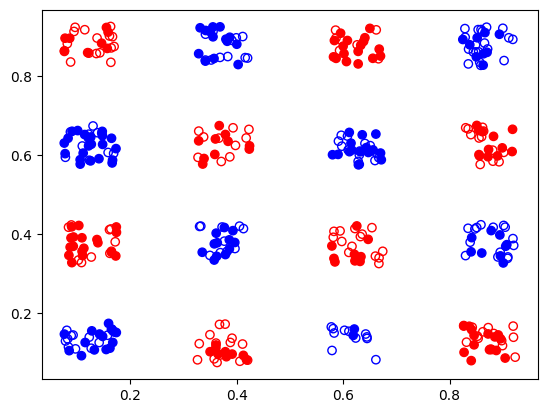

In [4]:
x_train_x = x_train[:,0]
x_train_y = x_train[:,1]
x_test_x = x_test[:,0]
x_test_y = x_test[:,1]

# -------------------------------- Initial Performance -----------------------------------

class_colors = {-1: "red", 1: "blue"}
colors_train = [class_colors[class_] for class_ in y_train]
colors_test = [class_colors[class_] for class_ in y_test]

plt.scatter(x_train_x, x_train_y, c = colors_train, marker = "o", label = "Train")
plt.scatter(x_test_x, x_test_y, marker = "o", facecolors="none", edgecolors=colors_test, label = "Test")
plt.show()

In [77]:
checkers[200] = {
    "x_train": x_train,
    "x_test": x_test,
    "y_train": y_train,
    "y_test": y_test
}


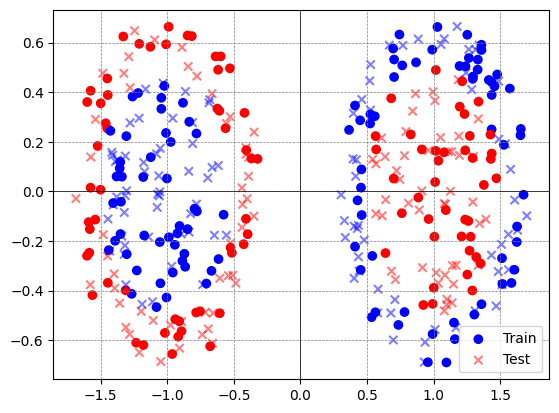

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_circle_data(center, radius, num_points, inner_label, outer_label):
    points = []
    labels = []
    
    for _ in range(num_points):
        angle = np.random.uniform(0, 2 * np.pi)
        r = np.sqrt(np.random.uniform(0, radius**2))
        x = center[0] + r * np.cos(angle)
        y = center[1] + r * np.sin(angle)
        
        points.append([x, y])
        if np.sqrt((x - center[0])**2 + (y - center[1])**2) <= 0.5:
            labels.append(inner_label)
        else:
            labels.append(outer_label)
    
    return points, labels

# Parameters
num_train = 100
num_test = 100
radius = np.sqrt(2) / 2

# Generate training data
train_points_1, train_labels_1 = generate_circle_data((1, 0), radius, num_train, 1, -1)
train_points_2, train_labels_2 = generate_circle_data((-1, 0), radius, num_train, -1, 1)

train_points = np.array(train_points_1 + train_points_2)
train_labels = np.array(train_labels_1 + train_labels_2)

# Generate test data
test_points_1, test_labels_1 = generate_circle_data((1, 0), radius, num_test, 1, -1)
test_points_2, test_labels_2 = generate_circle_data((-1, 0), radius, num_test, -1, 1)

test_points = np.array(test_points_1 + test_points_2)
test_labels = np.array(test_labels_1 + test_labels_2)

# Plot the dataset
plt.scatter(train_points[:, 0], train_points[:, 1], c=train_labels, cmap='bwr', marker='o', label='Train')
plt.scatter(test_points[:, 0], test_points[:, 1], c=test_labels, cmap='bwr', marker='x', label='Test', alpha=0.5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

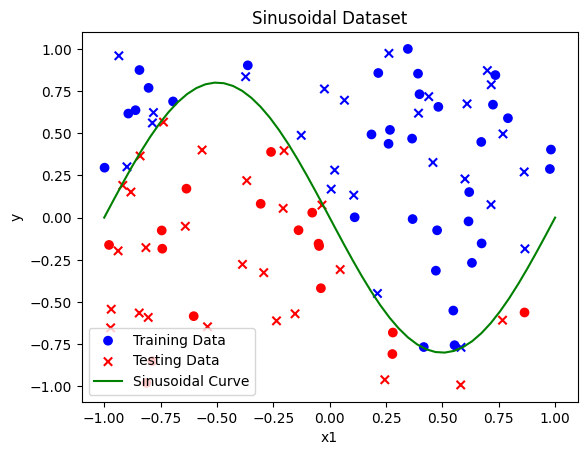

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate the sinusoidal dataset
def generate_sinus_dataset(n_points):
    x1 = np.random.uniform(-1, 1, n_points)
    y = np.random.uniform(-1, 1, n_points)
    curve = -0.8 * np.sin(np.pi * x1)
    labels = np.where(y > curve, -1, 1)
    data = np.vstack((x1, y)).T
    return data, labels

# Generate 50 training points
x_train, y_train = generate_sinus_dataset(50)
# Generate 50 testing points
x_test, y_test = generate_sinus_dataset(50)

# Plotting the dataset
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr', label='Training Data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='bwr', marker='x', label='Testing Data')
plt.plot(np.linspace(-1, 1, 50), -0.8 * np.sin(np.pi * np.linspace(-1, 1, 50)), 'g-', label='Sinusoidal Curve')
plt.legend()
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Sinusoidal Dataset')
plt.show()

In [15]:
dataset = {
    "x_train": x_train,
    "y_train": y_train,
    "x_test": x_test,
    "y_test": y_test
}

np.save("datasets/small_sine_dataset.npy", dataset)